In [3]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Show plots inline
%matplotlib inline


In [4]:
# Load your dataset (make sure 'spam.csv' is in the same directory)
df = pd.read_csv('spam.csv')  # CSV should have columns: label,message

# Preview
df.head()


,label,message
0,spam,Congratulations! You've won a $1000 Walmart gi...
1,ham,"Hi John, can we reschedule our meeting to tomo..."
2,spam,You have been selected for a free cruise to th...
3,ham,Don't forget to bring the documents to the off...
4,spam,Urgent! Your account has been suspended. Click...


In [5]:
# Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Drop any rows with missing values (optional safety check)
df.dropna(inplace=True)

# Preview
df.head()


,label,message
0,1,Congratulations! You've won a $1000 Walmart gi...
1,0,"Hi John, can we reschedule our meeting to tomo..."
2,1,You have been selected for a free cruise to th...
3,0,Don't forget to bring the documents to the off...
4,1,Urgent! Your account has been suspended. Click...


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)



In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)


In [13]:
model = MultinomialNB()
model.fit(X_train_tf, y_train)
model = MultinomialNB(alpha=0.1, fit_prior=True)

In [10]:
y_pred = model.predict(X_test_tf)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy: 1.0


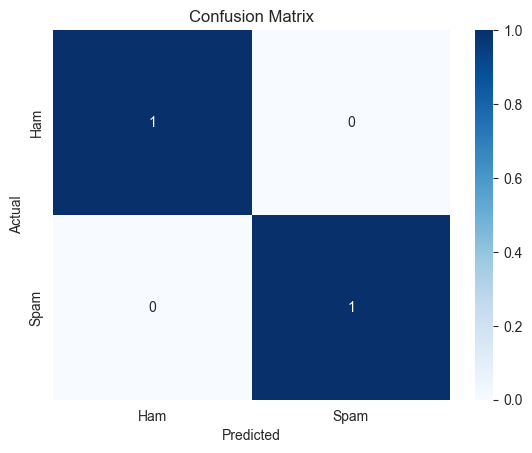

In [11]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
